<a href="https://colab.research.google.com/github/RedPanda54/Machine_Learning_study/blob/main/kNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**(0) 'pandas'를 이용해 'fake_bills' csv파일을 불러옴.**

In [1]:
import pandas as pd
target_URL = "https://raw.githubusercontent.com/RedPanda54/Machine_Learning_study/main/fake_bills.csv"
df = pd.read_csv(target_URL, sep=';')
df.info() # information에서 확인해보면 'margin_low'열에 null 자리가 37개가 있음을 알 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [2]:
df.isna().sum() # 좀 더 명확하게 결측치 총 개수를 확인할 수 있다.

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

**(1) One_hot_encoding**

In [3]:
one_hot_encoding = pd.get_dummies(df, columns = ['margin_low'], dummy_na = True)
print(one_hot_encoding)

      is_genuine  diagonal  height_left  height_right  margin_up  length  \
0           True    171.81       104.86        104.95       2.89  112.83   
1           True    171.46       103.36        103.66       2.99  113.09   
2           True    172.69       104.48        103.50       2.94  113.16   
3           True    171.36       103.91        103.94       3.01  113.51   
4           True    171.73       104.28        103.46       3.48  112.54   
...          ...       ...          ...           ...        ...     ...   
1495       False    171.75       104.38        104.17       3.09  111.28   
1496       False    172.19       104.63        104.44       3.37  110.97   
1497       False    171.80       104.01        104.12       3.36  111.95   
1498       False    172.06       104.28        104.06       3.46  112.25   
1499       False    171.47       104.15        103.82       3.37  112.07   

      margin_low_2.98  margin_low_3.12  margin_low_3.16  margin_low_3.24  ...  \
0     

**(2)-i 'missingno'를 사용해 결측치 시각화**

<Axes: >

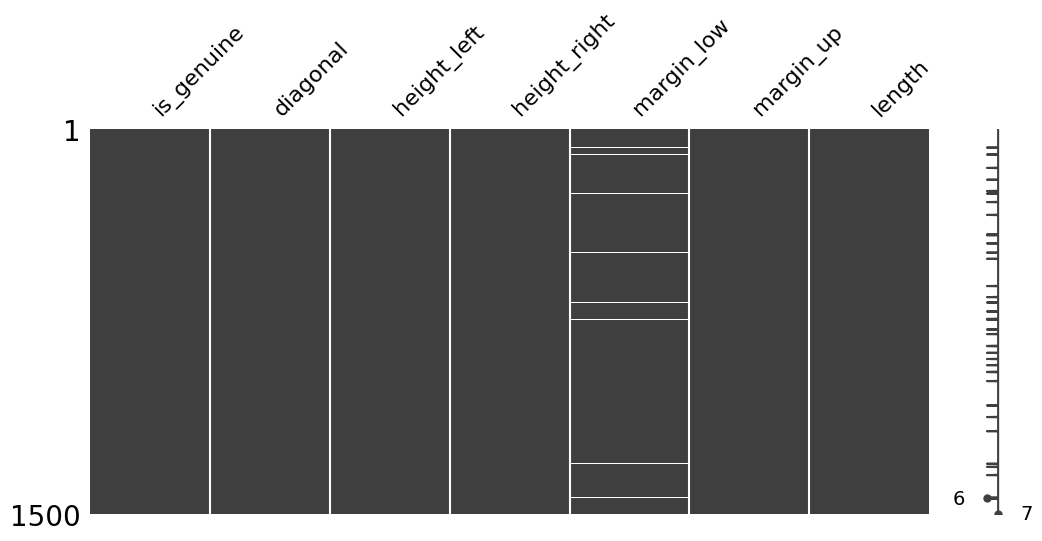

In [4]:
import missingno as msno
msno.matrix(df, figsize = (12, 5)) # matrix 키워드로 결측치가 발생한 대략적인 위치 파악

<Axes: >

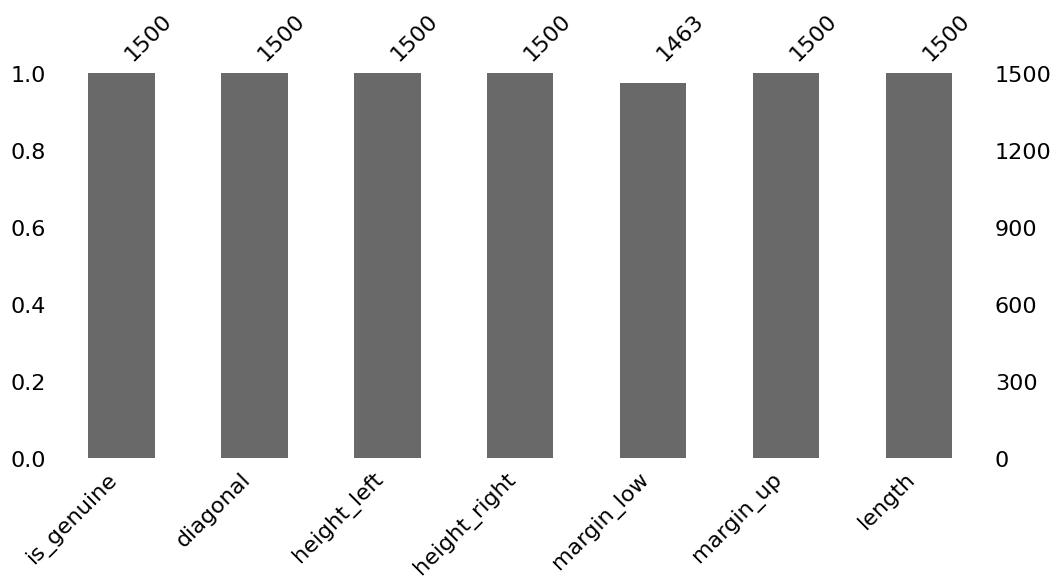

In [5]:
msno.bar(df, figsize = (12, 5)) # bar 키워드로 수치까지 표현해서 몇 개의 결측치가 있는지 파악

**(2)-ii kNN을 이용해 결측치 채우기**

In [6]:
import numpy as np
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
filled_df = imputer.fit_transform(df)
pd.DataFrame(filled_df)

,0,1,2,3,4,5,6
0,1.0,171.81,104.86,104.95,4.52,2.89,112.83
1,1.0,171.46,103.36,103.66,3.77,2.99,113.09
2,1.0,172.69,104.48,103.50,4.40,2.94,113.16
3,1.0,171.36,103.91,103.94,3.62,3.01,113.51
4,1.0,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0.0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0.0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0.0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0.0,172.06,104.28,104.06,5.17,3.46,112.25


In [7]:
pd.DataFrame(df) # 원본데이터와 비교해 보았을 때 결측치 부분이 잘 보간되었음을 알수 있다.

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [8]:
print(type(df))
print(type(filled_df)) # 원래 dataset과 결측치를 보간한 dataset은 데이터 타입이 다르다.

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


**(3) 자료 확인 (np.corrcoef)**

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_mat = np.corrcoef(filled_df,rowvar=False) # 상관계수를 계산해주는 함수
print(np.round(corr_mat,3)) # 완전히 symmetric한 형태

[[ 1.     0.133 -0.38  -0.485 -0.785 -0.606  0.849]
 [ 0.133  1.     0.019 -0.024 -0.111 -0.056  0.098]
 [-0.38   0.019  1.     0.242  0.308  0.247 -0.321]
 [-0.485 -0.024  0.242  1.     0.39   0.307 -0.402]
 [-0.785 -0.111  0.308  0.39   1.     0.428 -0.667]
 [-0.606 -0.056  0.247  0.307  0.428  1.    -0.521]
 [ 0.849  0.098 -0.321 -0.402 -0.667 -0.521  1.   ]]


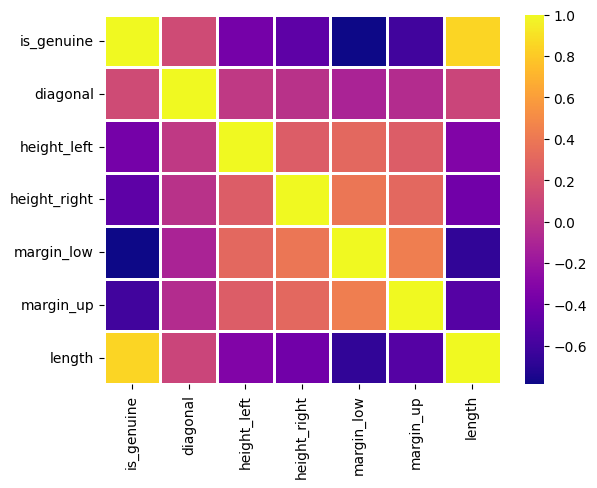

<Figure size 1000x800 with 0 Axes>

In [10]:
corr_df = pd.DataFrame(corr_mat,columns=df.columns,index=df.columns)
sns.heatmap(corr_df, linewidth=1, vmax = 1.0, cmap='plasma')
plt.figure(figsize=(10, 8))
plt.show() # heatmap으로 표현

**(4) standardization**

In [11]:
from sklearn.preprocessing import StandardScaler
data_standadized = StandardScaler().fit_transform(filled_df)
pd.DataFrame(data_standadized)

,0,1,2,3,4,5,6
0,0.707107,-0.486540,2.774123,3.163240,0.054615,-1.128325,0.173651
1,0.707107,-1.633729,-2.236535,-0.799668,-1.082481,-0.696799,0.471666
2,0.707107,2.397823,1.504756,-1.291191,-0.127320,-0.912562,0.551901
3,0.707107,-1.961498,-0.399294,0.060498,-1.309900,-0.610494,0.953075
4,0.707107,-0.748754,0.836669,-1.414072,-0.673126,1.417677,-0.158750
...,...,...,...,...,...,...,...
1495,-1.414214,-0.683201,1.170713,0.767063,-0.096998,-0.265273,-1.602978
1496,-1.414214,0.758981,2.005822,1.596509,1.191711,0.942999,-1.958303
1497,-1.414214,-0.519316,-0.065250,0.613462,1.555581,0.899846,-0.835016
1498,-1.414214,0.332882,0.836669,0.429141,1.040098,1.331372,-0.491152


**(5) train dataset, test dataset 구분**

In [17]:
df_sta = pd.DataFrame(data_standadized)
feature_df = df_sta.iloc[:, :-1]
target_df = df_sta.iloc[:, -1]
target_df_encoded = pd.get_dummies(target_df)
df_sta.keys()

RangeIndex(start=0, stop=7, step=1)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(feature_df, target_df, test_size = 0.3, stratify = target_df, random_state = 100)

ValueError: ignored

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(feature_df, target_df_encoded, test_size = 0.3, random_state = 100)

In [19]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

1050
450
1050
450


**(6) GridSearch**

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1,25)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             scoring='accuracy')

**(7) score**

In [27]:
y_pred = grid.predict(X_test)
